In [9]:
import networkx as nx
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from helper import *
%matplotlib inline

In [10]:
trades_df2016, trades_df2011, trades_df2006, trades_df2001, trades_Total, gasTrades_Total, coalTrades_Total, oilTrades_Total = get_data()



In [11]:
# G_Value of Global fossil fuel trade in 2016
G = genGraph4Year(trades_Total, 2016)[0]

In [12]:
# Calculate eigenvector centrality of matrix G 
# with the exports value as weights
ec = nx.eigenvector_centrality_numpy(G, weight='Weight (1000kg)')

# Set this as a node attribute for each node
nx.set_node_attributes(G, ec, name='cent')

# Use this measure to determine the node color in viz
node_color = [float(G.node[v]['cent']) for v in G]

In [13]:
# Blank dictionary to store total exports
totexp = {}
avgexp = list()
# Calculate total exports of each country in the network
for exp in G.nodes(): 
    tx=sum([float(G[exp][u]['Weight (1000kg)']) for u in  G.neighbors(exp)])
     #tx=sum([float(g) for exp,f,g in G.neighbors(exp, 'weight')])
    totexp[exp] = tx
    avgexp.append(np.mean(tx))
    
nx.set_node_attributes(G, totexp,name='totexp')

# Use the results later for the node's size in the graph
node_size = [float(G.node[v]['totexp'])*10 / np.mean(avgexp) for v in G]

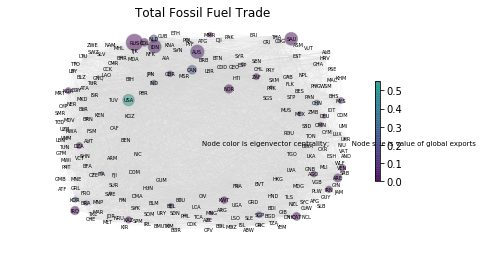

In [14]:
# Visualization
# Calculate position of each node in G using networkx spring layout
pos = nx.spring_layout(G,k=30,iterations=8) 

# Draw nodes
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, \
                               node_color=node_color, alpha=0.5) 
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edge_color='lightgray', \
                               arrows=False, width=0.05,)

# Add labels
nx.draw_networkx_labels(G,pos,font_size=5)
nodes.set_edgecolor('gray')

# Add labels and title
plt.text(0,-0.1, \
         'Node color is eigenvector centrality; \
         Node size is value of global exports', \
         fontsize=7)
plt.title('Total Fossil Fuel Trade', fontsize=12)

# Bar with color scale for eigenvalues
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0, 1)

# Plot options
#plt.margins(0,0)
plt.axis('off')
plt.show()
plt.close()